<a href="https://colab.research.google.com/github/osama-kheshaifaty/SPE-KSA-WORKSHOP-2025/blob/main/classification_ex_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


First few rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture 

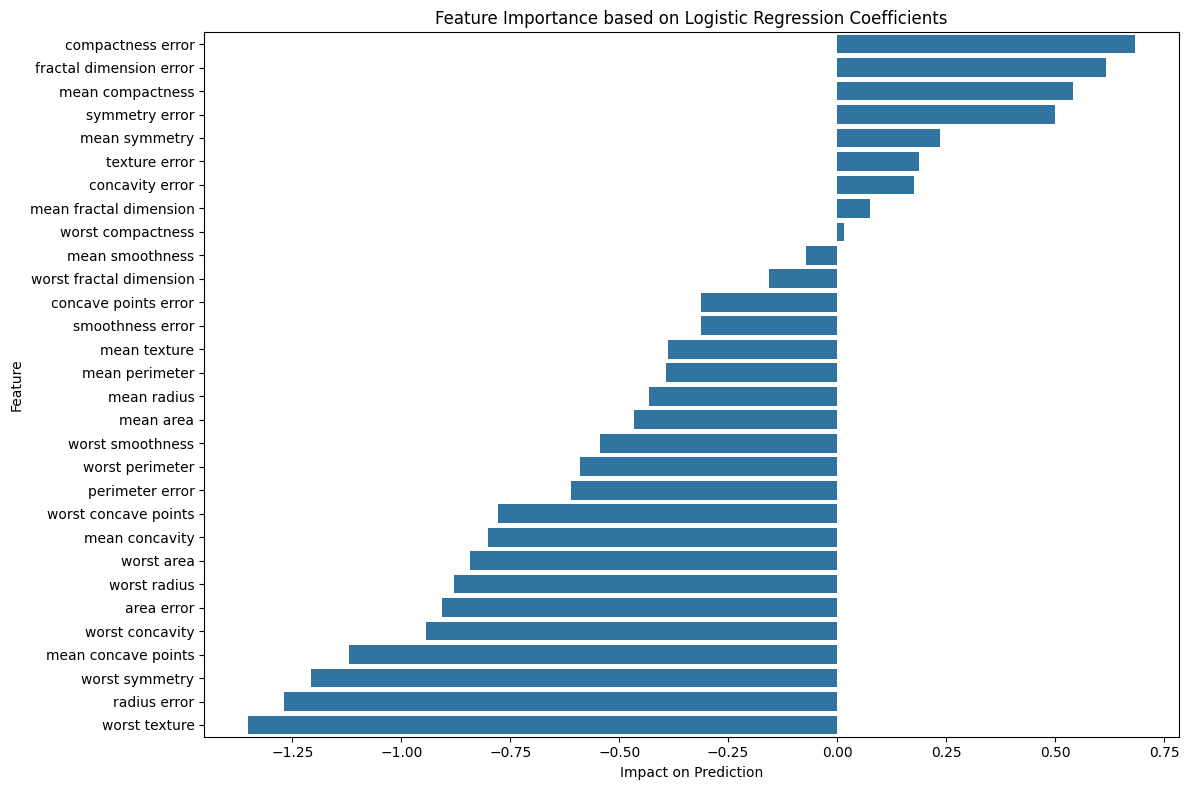

In [3]:
# Realistic Simple Classification: Predicting Cancer Presence (Sklearn Dataset)
# -------------------------------------------------------------------------------

# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load Dataset (no URL needed!)
# ----------------------------------------------------------
# This is a small medical dataset (569 samples), built into sklearn.
data = load_breast_cancer()

# Convert to DataFrame
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("\nFirst few rows of the dataset:")
print(X.head())

print("\nTarget labels (0 = Malignant, 1 = Benign):")
print(y.value_counts())

# Step 3: Split Data
# ----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Build and Train Logistic Regression Model
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test_scaled)

# Step 7: Evaluate the Model
# ----------------------------------------------------------

# Accuracy: how often the model predicts correctly overall
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Confusion Matrix:
# - True Positives (TP): correctly predicted cancer
# - True Negatives (TN): correctly predicted no cancer
# - False Positives (FP): predicted cancer but was healthy
# - False Negatives (FN): predicted healthy but had cancer (VERY BAD)
conf_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_mat)

# Classification Report:
# - Precision: Out of all predicted positives, how many were correct?
# - Recall: Out of all actual positives, how many were detected?
# - F1 Score: Balance between precision and recall.
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Malignant", "Benign"]))

# Step 8: Analyze Feature Importance
# ----------------------------------------------------------
# Logistic Regression gives us coefficients per feature.

coefficients = pd.DataFrame({
    'Feature': data.feature_names,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance (Coefficients):")
print(coefficients)

# Step 9: Visualize Feature Importance
plt.figure(figsize=(12,8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.xlabel('Impact on Prediction')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
